In [40]:
#For testing, import the user name
from env import api_key
import requests
import pandas as pd
from bs4 import BeautifulSoup
from env import api_key
from time import sleep
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
from acquire import *
from prepare import *

pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.reset_option("display.max_rows", "display.max_columns")

import re

In [ ]:
for i in range(1,21):
    if i%5 != 0:
        build_extracted_df(username = 'jared', path = './', time = i)
    else:
        pass


Finished with: 0 of 499
Skipping: 1 due to <1 min or not classic
Skipping: 2 due to <1 min or not classic
Skipping: 3 due to <1 min or not classic
Skipping: 4 due to <1 min or not classic
Skipping: 5 due to <1 min or not classic
Skipping: 6 due to <1 min or not classic
Skipping: 7 due to <1 min or not classic
Skipping: 8 due to <1 min or not classic
Skipping: 9 due to <1 min or not classic

Finished with: 10 of 499
Skipping: 11 due to <1 min or not classic
Skipping: 12 due to <1 min or not classic
Skipping: 13 due to <1 min or not classic
Skipping: 14 due to <1 min or not classic

Finished with: 15 of 499

Finished with: 16 of 499

Finished with: 17 of 499
Skipping: 18 due to <1 min or not classic
Skipping: 19 due to <1 min or not classic
Skipping: 20 due to <1 min or not classic

Finished with: 21 of 499
Skipping: 22 due to <1 min or not classic
Skipping: 23 due to <1 min or not classic

Finished with: 24 of 499

Finished with: 25 of 499
Skipping: 26 due to <1 min or not classic
Skip


Finished with: 234 of 499

Finished with: 235 of 499
Skipping: 236 due to <1 min or not classic
Finished with: 237 of 499
Skipping: 238 due to <1 min or not classic
Skipping: 239 due to <1 min or not classic
Skipping: 240 due to <1 min or not classic
Skipping: 241 due to <1 min or not classic
Finished with: 242 of 499
Skipping: 243 due to <1 min or not classic
Skipping: 244 due to <1 min or not classic

Finished with: 245 of 499

Finished with: 246 of 499
Skipping: 247 due to <1 min or not classic

Finished with: 248 of 499

Finished with: 249 of 499
Finished with: 250 of 499

Finished with: 251 of 499

Finished with: 252 of 499

Finished with: 253 of 499
Skipping: 254 due to <1 min or not classic
Skipping: 255 due to <1 min or not classic

Finished with: 256 of 499

Finished with: 257 of 499
Skipping: 258 due to <1 min or not classic

Finished with: 259 of 499

Finished with: 260 of 499
Skipping: 261 due to <1 min or not classic

Finished with: 262 of 499
Skipping: 263 due to <1 min 


Finished with: 464 of 499

Finished with: 465 of 499
Skipping: 466 due to <1 min or not classic
Skipping: 467 due to <1 min or not classic

Finished with: 468 of 499
Finished with: 469 of 499

Finished with: 470 of 499

Finished with: 471 of 499

Finished with: 472 of 499

Finished with: 473 of 499

Finished with: 474 of 499
Skipping: 475 due to <1 min or not classic

Finished with: 476 of 499
Skipping: 477 due to <1 min or not classic

Finished with: 478 of 499

Finished with: 479 of 499
Skipping: 480 due to <1 min or not classic
Skipping: 481 due to <1 min or not classic
Skipping: 482 due to <1 min or not classic
Skipping: 483 due to <1 min or not classic
Skipping: 484 due to <1 min or not classic
Skipping: 485 due to <1 min or not classic
Skipping: 486 due to <1 min or not classic
Skipping: 487 due to <1 min or not classic
Skipping: 488 due to <1 min or not classic
Skipping: 489 due to <1 min or not classic
Skipping: 490 due to <1 min or not classic
Skipping: 491 due to <1 min or n


Finished with: 189 of 499

Finished with: 190 of 499

Finished with: 191 of 499
Skipping: 192 due to <1 min or not classic
Skipping: 193 due to <1 min or not classic
Skipping: 194 due to <1 min or not classic

Finished with: 195 of 499
Skipping: 196 due to <1 min or not classic

Finished with: 197 of 499
Skipping: 198 due to <1 min or not classic

Finished with: 199 of 499

Finished with: 200 of 499

Finished with: 201 of 499
Skipping: 202 due to <1 min or not classic

Finished with: 203 of 499

Finished with: 204 of 499

Finished with: 205 of 499

Finished with: 206 of 499

Finished with: 207 of 499
Skipping: 208 due to <1 min or not classic

Finished with: 209 of 499

Finished with: 210 of 499

Finished with: 211 of 499

Finished with: 212 of 499

Finished with: 213 of 499

Finished with: 214 of 499

Finished with: 215 of 499

Finished with: 216 of 499
Skipping: 217 due to <1 min or not classic

Finished with: 218 of 499

Finished with: 219 of 499

Finished with: 220 of 499

Finishe


Finished with: 427 of 499
Skipping: 428 due to <1 min or not classic
Skipping: 429 due to <1 min or not classic
Skipping: 430 due to <1 min or not classic
Skipping: 431 due to <1 min or not classic
Skipping: 432 due to <1 min or not classic
Skipping: 433 due to <1 min or not classic
Skipping: 434 due to <1 min or not classic

Finished with: 435 of 499
Skipping: 436 due to <1 min or not classic
Skipping: 437 due to <1 min or not classic
Skipping: 438 due to <1 min or not classic
Skipping: 439 due to <1 min or not classic

Finished with: 440 of 499
Skipping: 441 due to <1 min or not classic
Skipping: 442 due to <1 min or not classic
Skipping: 443 due to <1 min or not classic
Skipping: 444 due to <1 min or not classic

Finished with: 445 of 499

Finished with: 446 of 499
Skipping: 447 due to <1 min or not classic
Finished with: 448 of 499

Finished with: 449 of 499

Finished with: 450 of 499

Finished with: 451 of 499
Skipping: 452 due to <1 min or not classic

Finished with: 453 of 499



Finished with: 153 of 499

Finished with: 154 of 499
Skipping: 155 due to <2 min or not classic
Skipping: 156 due to <2 min or not classic
Finished with: 157 of 499

Finished with: 158 of 499
Skipping: 159 due to <2 min or not classic
Skipping: 160 due to <2 min or not classic

Finished with: 161 of 499
Finished with: 162 of 499

Finished with: 163 of 499

Finished with: 164 of 499

Finished with: 165 of 499
Skipping: 166 due to <2 min or not classic
Skipping: 167 due to <2 min or not classic
Skipping: 168 due to <2 min or not classic
Skipping: 169 due to <2 min or not classic
Skipping: 170 due to <2 min or not classic

Finished with: 171 of 499

Finished with: 172 of 499

Finished with: 173 of 499
Skipping: 174 due to <2 min or not classic
Skipping: 175 due to <2 min or not classic
Skipping: 176 due to <2 min or not classic
Skipping: 177 due to <2 min or not classic

Finished with: 178 of 499

Finished with: 179 of 499
Skipping: 180 due to <2 min or not classic
Skipping: 181 due to <


Finished with: 388 of 499
Skipping: 389 due to <2 min or not classic

Finished with: 390 of 499

Finished with: 391 of 499
Finished with: 392 of 499

Finished with: 393 of 499
Skipping: 394 due to <2 min or not classic
Skipping: 395 due to <2 min or not classic
Skipping: 396 due to <2 min or not classic
Skipping: 397 due to <2 min or not classic
Skipping: 398 due to <2 min or not classic

Finished with: 399 of 499
Skipping: 400 due to <2 min or not classic

Finished with: 401 of 499
Finished with: 402 of 499
Skipping: 403 due to <2 min or not classic
Skipping: 404 due to <2 min or not classic

Finished with: 405 of 499

Finished with: 406 of 499

Finished with: 407 of 499

Finished with: 408 of 499

Finished with: 409 of 499
Finished with: 410 of 499

Finished with: 411 of 499

Finished with: 412 of 499

Finished with: 413 of 499
Skipping: 414 due to <2 min or not classic
Skipping: 415 due to <2 min or not classic

Finished with: 416 of 499

Finished with: 417 of 499

Finished with: 4


Finished with: 126 of 499
Skipping: 127 due to <2 min or not classic
Skipping: 128 due to <2 min or not classic
Skipping: 129 due to <2 min or not classic
Skipping: 130 due to <2 min or not classic

Finished with: 131 of 499

Finished with: 132 of 499

Finished with: 133 of 499
Skipping: 134 due to <2 min or not classic
Skipping: 135 due to <2 min or not classic

Finished with: 136 of 499

Finished with: 137 of 499
Skipping: 138 due to <2 min or not classic
Skipping: 139 due to <2 min or not classic
Skipping: 140 due to <2 min or not classic
Skipping: 141 due to <2 min or not classic
Skipping: 142 due to <2 min or not classic
Skipping: 143 due to <2 min or not classic
Skipping: 144 due to <2 min or not classic
Skipping: 145 due to <2 min or not classic
Skipping: 146 due to <2 min or not classic
Skipping: 147 due to <2 min or not classic
Skipping: 148 due to <2 min or not classic
Skipping: 149 due to <2 min or not classic
Skipping: 150 due to <2 min or not classic
Skipping: 151 due to 


Finished with: 354 of 499
Skipping: 355 due to <2 min or not classic

Finished with: 356 of 499
Skipping: 357 due to <2 min or not classic
Skipping: 358 due to <2 min or not classic
Skipping: 359 due to <2 min or not classic
Skipping: 360 due to <2 min or not classic
Skipping: 361 due to <2 min or not classic
Skipping: 362 due to <2 min or not classic
Skipping: 363 due to <2 min or not classic

Finished with: 364 of 499
Skipping: 365 due to <2 min or not classic
Skipping: 366 due to <2 min or not classic

Finished with: 367 of 499
Skipping: 368 due to <2 min or not classic
Skipping: 369 due to <2 min or not classic

Finished with: 370 of 499
Skipping: 371 due to <2 min or not classic
Skipping: 372 due to <2 min or not classic
Finished with: 373 of 499
Skipping: 374 due to <2 min or not classic

Finished with: 375 of 499

Finished with: 376 of 499

Finished with: 377 of 499

Finished with: 378 of 499

Finished with: 379 of 499
Skipping: 380 due to <2 min or not classic
Skipping: 381 du

Finished with: 73 of 499
Finished with: 74 of 499
Finished with: 75 of 499
Finished with: 76 of 499
Finished with: 77 of 499
Finished with: 78 of 499

Finished with: 79 of 499
Skipping: 80 due to <3 min or not classic
Finished with: 81 of 499
Finished with: 82 of 499

Finished with: 83 of 499

Finished with: 84 of 499

Finished with: 85 of 499

Finished with: 86 of 499
Finished with: 87 of 499
Skipping: 88 due to <3 min or not classic
Finished with: 89 of 499
Finished with: 90 of 499
Skipping: 91 due to <3 min or not classic
Skipping: 92 due to <3 min or not classic

Finished with: 93 of 499
Skipping: 94 due to <3 min or not classic
Finished with: 95 of 499

Finished with: 96 of 499
Finished with: 97 of 499
Finished with: 98 of 499
Finished with: 99 of 499
Skipping: 100 due to <3 min or not classic
Skipping: 101 due to <3 min or not classic
Skipping: 102 due to <3 min or not classic
Finished with: 103 of 499

Finished with: 104 of 499

Finished with: 105 of 499

Finished with: 106 of 4

Finished with: 315 of 499
Finished with: 316 of 499

Finished with: 317 of 499

Finished with: 318 of 499
Skipping: 319 due to <3 min or not classic
Skipping: 320 due to <3 min or not classic
Skipping: 321 due to <3 min or not classic
Skipping: 322 due to <3 min or not classic
Skipping: 323 due to <3 min or not classic
Skipping: 324 due to <3 min or not classic
Skipping: 325 due to <3 min or not classic
Skipping: 326 due to <3 min or not classic
Skipping: 327 due to <3 min or not classic
Skipping: 328 due to <3 min or not classic
Skipping: 329 due to <3 min or not classic
Skipping: 330 due to <3 min or not classic
Skipping: 331 due to <3 min or not classic
Skipping: 332 due to <3 min or not classic
Skipping: 333 due to <3 min or not classic
Skipping: 334 due to <3 min or not classic
Skipping: 335 due to <3 min or not classic
Skipping: 336 due to <3 min or not classic
Skipping: 337 due to <3 min or not classic

Finished with: 338 of 499
Finished with: 339 of 499
Skipping: 340 due to <3 

Finished with: 43 of 499
Skipping: 44 due to <3 min or not classic

Finished with: 45 of 499

Finished with: 46 of 499
Finished with: 47 of 499
Skipping: 48 due to <3 min or not classic
Skipping: 49 due to <3 min or not classic
Skipping: 50 due to <3 min or not classic
Finished with: 51 of 499

Finished with: 52 of 499
Finished with: 53 of 499
Finished with: 54 of 499
Finished with: 55 of 499
Skipping: 56 due to <3 min or not classic
Finished with: 57 of 499

Finished with: 58 of 499

Finished with: 59 of 499
Skipping: 60 due to <3 min or not classic
Skipping: 61 due to <3 min or not classic
Skipping: 62 due to <3 min or not classic
Skipping: 63 due to <3 min or not classic
Skipping: 64 due to <3 min or not classic
Finished with: 65 of 499

Finished with: 66 of 499
Skipping: 67 due to <3 min or not classic
Finished with: 68 of 499

Finished with: 69 of 499
Skipping: 70 due to <3 min or not classic
Finished with: 71 of 499
Finished with: 72 of 499
Finished with: 73 of 499

Finished with

Finished with: 281 of 499
Skipping: 282 due to <3 min or not classic
Skipping: 283 due to <3 min or not classic
Skipping: 284 due to <3 min or not classic
Skipping: 285 due to <3 min or not classic

Finished with: 286 of 499
Finished with: 287 of 499
Skipping: 288 due to <3 min or not classic
Skipping: 289 due to <3 min or not classic
Skipping: 290 due to <3 min or not classic
Skipping: 291 due to <3 min or not classic
Skipping: 292 due to <3 min or not classic

Finished with: 293 of 499
Finished with: 294 of 499
Finished with: 295 of 499

Finished with: 296 of 499

Finished with: 297 of 499
Skipping: 298 due to <3 min or not classic

Finished with: 299 of 499
Finished with: 300 of 499
Skipping: 301 due to <3 min or not classic

Finished with: 302 of 499
Skipping: 303 due to <3 min or not classic
Skipping: 304 due to <3 min or not classic
Skipping: 305 due to <3 min or not classic
Finished with: 306 of 499
Skipping: 307 due to <3 min or not classic
Skipping: 308 due to <3 min or not cl


Finished with: 10 of 499
Skipping: 11 due to <4 min or not classic
Skipping: 12 due to <4 min or not classic
Skipping: 13 due to <4 min or not classic
Skipping: 14 due to <4 min or not classic
Finished with: 15 of 499
Finished with: 16 of 499
Finished with: 17 of 499
Skipping: 18 due to <4 min or not classic
Skipping: 19 due to <4 min or not classic
Skipping: 20 due to <4 min or not classic
Finished with: 21 of 499
Skipping: 22 due to <4 min or not classic
Skipping: 23 due to <4 min or not classic

Finished with: 24 of 499

Finished with: 25 of 499
Skipping: 26 due to <4 min or not classic
Skipping: 27 due to <4 min or not classic
Skipping: 28 due to <4 min or not classic
Skipping: 29 due to <4 min or not classic
Finished with: 30 of 499

Finished with: 31 of 499
Finished with: 32 of 499
Finished with: 33 of 499
Skipping: 34 due to <4 min or not classic
Skipping: 35 due to <4 min or not classic
Finished with: 36 of 499
Skipping: 37 due to <4 min or not classic
Skipping: 38 due to <4 m

Finished with: 248 of 499
Finished with: 249 of 499
Finished with: 250 of 499
Finished with: 251 of 499

Finished with: 252 of 499
Finished with: 253 of 499
Skipping: 254 due to <4 min or not classic
Skipping: 255 due to <4 min or not classic
Finished with: 256 of 499
Finished with: 257 of 499
Skipping: 258 due to <4 min or not classic
Finished with: 259 of 499
Finished with: 260 of 499
Skipping: 261 due to <4 min or not classic
Finished with: 262 of 499
Skipping: 263 due to <4 min or not classic
Skipping: 264 due to <4 min or not classic
Skipping: 265 due to <4 min or not classic
Skipping: 266 due to <4 min or not classic
Skipping: 267 due to <4 min or not classic
Finished with: 268 of 499
Skipping: 269 due to <4 min or not classic
Finished with: 270 of 499

Finished with: 271 of 499
Finished with: 272 of 499
Finished with: 273 of 499
Finished with: 274 of 499
Skipping: 275 due to <4 min or not classic
Skipping: 276 due to <4 min or not classic
Skipping: 277 due to <4 min or not class

Finished with: 496 of 499
Finished with: 497 of 499
Finished with: 498 of 499
Finished with: 499 of 499
Done! now lets get some korean bbq, more chicken plz! haha....follow suit
Done! now lets get some korean bbq, more chicken plz! haha....follow suit
Skipping: 0 due to <4 min or not classic
Skipping: 1 due to <4 min or not classic
Skipping: 2 due to <4 min or not classic
Skipping: 3 due to <4 min or not classic
Skipping: 4 due to <4 min or not classic
Skipping: 5 due to <4 min or not classic
Skipping: 6 due to <4 min or not classic
Finished with: 7 of 499
Skipping: 8 due to <4 min or not classic

Finished with: 9 of 499
Finished with: 10 of 499
Finished with: 11 of 499
Finished with: 12 of 499
Skipping: 13 due to <4 min or not classic
Finished with: 14 of 499
Finished with: 15 of 499

Finished with: 16 of 499
Finished with: 17 of 499
Skipping: 18 due to <4 min or not classic
Skipping: 19 due to <4 min or not classic
Skipping: 20 due to <4 min or not classic
Skipping: 21 due to <4 min 


Finished with: 230 of 499
Skipping: 231 due to <4 min or not classic
Skipping: 232 due to <4 min or not classic
Finished with: 233 of 499
Finished with: 234 of 499

Finished with: 235 of 499

Finished with: 236 of 499
Skipping: 237 due to <4 min or not classic
Finished with: 238 of 499
Finished with: 239 of 499
Skipping: 240 due to <4 min or not classic
Skipping: 241 due to <4 min or not classic
Skipping: 242 due to <4 min or not classic
Finished with: 243 of 499
Finished with: 244 of 499
Finished with: 245 of 499
Finished with: 246 of 499
Finished with: 247 of 499
Skipping: 248 due to <4 min or not classic
Skipping: 249 due to <4 min or not classic
Finished with: 250 of 499

Finished with: 251 of 499
Finished with: 252 of 499
Skipping: 253 due to <4 min or not classic
Skipping: 254 due to <4 min or not classic
Skipping: 255 due to <4 min or not classic
Finished with: 256 of 499
Skipping: 257 due to <4 min or not classic
Skipping: 258 due to <4 min or not classic
Finished with: 259 of


Finished with: 459 of 499
Skipping: 460 due to <4 min or not classic

Finished with: 461 of 499
Finished with: 462 of 499
Finished with: 463 of 499
Finished with: 464 of 499
Skipping: 465 due to <4 min or not classic
Skipping: 466 due to <4 min or not classic
Skipping: 467 due to <4 min or not classic
Skipping: 468 due to <4 min or not classic
Skipping: 469 due to <4 min or not classic
Skipping: 470 due to <4 min or not classic
Skipping: 471 due to <4 min or not classic
Skipping: 472 due to <4 min or not classic
Skipping: 473 due to <4 min or not classic
Skipping: 474 due to <4 min or not classic
Finished with: 475 of 499
Skipping: 476 due to <4 min or not classic
Finished with: 477 of 499
Finished with: 478 of 499
Finished with: 479 of 499
Finished with: 480 of 499
Finished with: 481 of 499
Skipping: 482 due to <4 min or not classic
Skipping: 483 due to <4 min or not classic
Skipping: 484 due to <4 min or not classic
Skipping: 485 due to <4 min or not classic
Skipping: 486 due to <4 

Finished with: 188 of 499
Finished with: 189 of 499
Finished with: 190 of 499
Finished with: 191 of 499
Finished with: 192 of 499
Finished with: 193 of 499
Skipping: 194 due to <6 min or not classic
Finished with: 195 of 499
Finished with: 196 of 499

Finished with: 197 of 499
Finished with: 198 of 499
Skipping: 199 due to <6 min or not classic
Finished with: 200 of 499
Finished with: 201 of 499
Skipping: 202 due to <6 min or not classic
Skipping: 203 due to <6 min or not classic
Finished with: 204 of 499
Finished with: 205 of 499
Skipping: 206 due to <6 min or not classic
Finished with: 207 of 499
Finished with: 208 of 499
Skipping: 209 due to <6 min or not classic
Finished with: 210 of 499
Skipping: 211 due to <6 min or not classic
Skipping: 212 due to <6 min or not classic
Skipping: 213 due to <6 min or not classic
Skipping: 214 due to <6 min or not classic
Skipping: 215 due to <6 min or not classic
Skipping: 216 due to <6 min or not classic
Skipping: 217 due to <6 min or not classi

Finished with: 420 of 499
Finished with: 421 of 499
Finished with: 422 of 499
Finished with: 423 of 499
Skipping: 424 due to <6 min or not classic
Finished with: 425 of 499
Finished with: 426 of 499
Skipping: 427 due to <6 min or not classic
Skipping: 428 due to <6 min or not classic
Finished with: 429 of 499
Skipping: 430 due to <6 min or not classic
Skipping: 431 due to <6 min or not classic
Finished with: 432 of 499
Skipping: 433 due to <6 min or not classic
Skipping: 434 due to <6 min or not classic
Skipping: 435 due to <6 min or not classic
Skipping: 436 due to <6 min or not classic
Skipping: 437 due to <6 min or not classic
Finished with: 438 of 499
Skipping: 439 due to <6 min or not classic
Finished with: 440 of 499
Finished with: 441 of 499
Finished with: 442 of 499
Finished with: 443 of 499
Skipping: 444 due to <6 min or not classic
Skipping: 445 due to <6 min or not classic
Finished with: 446 of 499
Skipping: 447 due to <6 min or not classic
Skipping: 448 due to <6 min or not

Finished with: 158 of 499
Finished with: 159 of 499
Skipping: 160 due to <6 min or not classic
Finished with: 161 of 499
Finished with: 162 of 499
Finished with: 163 of 499
Skipping: 164 due to <6 min or not classic
Skipping: 165 due to <6 min or not classic
Finished with: 166 of 499
Skipping: 167 due to <6 min or not classic
Skipping: 168 due to <6 min or not classic
Skipping: 169 due to <6 min or not classic
Skipping: 170 due to <6 min or not classic
Skipping: 171 due to <6 min or not classic
Skipping: 172 due to <6 min or not classic
Skipping: 173 due to <6 min or not classic
Finished with: 174 of 499
Finished with: 175 of 499
Skipping: 176 due to <6 min or not classic
Skipping: 177 due to <6 min or not classic
Skipping: 178 due to <6 min or not classic
Skipping: 179 due to <6 min or not classic
Skipping: 180 due to <6 min or not classic
Skipping: 181 due to <6 min or not classic
Skipping: 182 due to <6 min or not classic
Finished with: 183 of 499
Skipping: 184 due to <6 min or not 

Finished with: 391 of 499
Finished with: 392 of 499
Skipping: 393 due to <6 min or not classic
Skipping: 394 due to <6 min or not classic
Skipping: 395 due to <6 min or not classic
Skipping: 396 due to <6 min or not classic
Finished with: 397 of 499
Finished with: 398 of 499
Finished with: 399 of 499
Finished with: 400 of 499
Finished with: 401 of 499
Finished with: 402 of 499
Skipping: 403 due to <6 min or not classic
Finished with: 404 of 499
Skipping: 405 due to <6 min or not classic
Finished with: 406 of 499
Finished with: 407 of 499
Skipping: 408 due to <6 min or not classic
Finished with: 409 of 499
Skipping: 410 due to <6 min or not classic
Skipping: 411 due to <6 min or not classic
Skipping: 412 due to <6 min or not classic
Finished with: 413 of 499
Skipping: 414 due to <6 min or not classic
Skipping: 415 due to <6 min or not classic
Skipping: 416 due to <6 min or not classic
Skipping: 417 due to <6 min or not classic

Finished with: 418 of 499
Finished with: 419 of 499
Skippin

Finished with: 121 of 499
Finished with: 122 of 499
Skipping: 123 due to <7 min or not classic
Skipping: 124 due to <7 min or not classic
Finished with: 125 of 499
Skipping: 126 due to <7 min or not classic
Finished with: 127 of 499
Finished with: 128 of 499
Skipping: 129 due to <7 min or not classic
Skipping: 130 due to <7 min or not classic
Skipping: 131 due to <7 min or not classic
Skipping: 132 due to <7 min or not classic
Skipping: 133 due to <7 min or not classic
Finished with: 134 of 499
Skipping: 135 due to <7 min or not classic
Finished with: 136 of 499
Finished with: 137 of 499
Skipping: 138 due to <7 min or not classic
Skipping: 139 due to <7 min or not classic
Skipping: 140 due to <7 min or not classic
Skipping: 141 due to <7 min or not classic
Finished with: 142 of 499
Skipping: 143 due to <7 min or not classic
Finished with: 144 of 499
Finished with: 145 of 499
Finished with: 146 of 499
Skipping: 147 due to <7 min or not classic
Skipping: 148 due to <7 min or not classic


Finished with: 354 of 499
Finished with: 355 of 499
Skipping: 356 due to <7 min or not classic
Finished with: 357 of 499
Skipping: 358 due to <7 min or not classic
Skipping: 359 due to <7 min or not classic
Skipping: 360 due to <7 min or not classic
Skipping: 361 due to <7 min or not classic
Skipping: 362 due to <7 min or not classic
Finished with: 363 of 499
Skipping: 364 due to <7 min or not classic
Finished with: 365 of 499
Finished with: 366 of 499
Finished with: 367 of 499
Finished with: 368 of 499
Skipping: 369 due to <7 min or not classic
Finished with: 370 of 499
Skipping: 371 due to <7 min or not classic
Skipping: 372 due to <7 min or not classic
Skipping: 373 due to <7 min or not classic
Skipping: 374 due to <7 min or not classic
Skipping: 375 due to <7 min or not classic
Finished with: 376 of 499
Skipping: 377 due to <7 min or not classic
Finished with: 378 of 499
Finished with: 379 of 499
Skipping: 380 due to <7 min or not classic
Skipping: 381 due to <7 min or not classic


Finished with: 92 of 499
Finished with: 93 of 499
Finished with: 94 of 499
Skipping: 95 due to <7 min or not classic
Skipping: 96 due to <7 min or not classic
Skipping: 97 due to <7 min or not classic
Finished with: 98 of 499
Skipping: 99 due to <7 min or not classic
Finished with: 100 of 499
Skipping: 101 due to <7 min or not classic
Finished with: 102 of 499
Skipping: 103 due to <7 min or not classic
Finished with: 104 of 499
Finished with: 105 of 499
Skipping: 106 due to <7 min or not classic
Finished with: 107 of 499
Finished with: 108 of 499
Skipping: 109 due to <7 min or not classic
Finished with: 110 of 499
Skipping: 111 due to <7 min or not classic
Finished with: 112 of 499
Finished with: 113 of 499
Skipping: 114 due to <7 min or not classic
Skipping: 115 due to <7 min or not classic
Skipping: 116 due to <7 min or not classic
Skipping: 117 due to <7 min or not classic
Finished with: 118 of 499
Finished with: 119 of 499
Skipping: 120 due to <7 min or not classic
Skipping: 121 du

Finished with: 333 of 499
Skipping: 334 due to <7 min or not classic
Skipping: 335 due to <7 min or not classic
Skipping: 336 due to <7 min or not classic
Finished with: 337 of 499
Finished with: 338 of 499
Skipping: 339 due to <7 min or not classic
Finished with: 340 of 499
Skipping: 341 due to <7 min or not classic
Skipping: 342 due to <7 min or not classic
Skipping: 343 due to <7 min or not classic
Skipping: 344 due to <7 min or not classic
Skipping: 345 due to <7 min or not classic
Skipping: 346 due to <7 min or not classic
Skipping: 347 due to <7 min or not classic
Skipping: 348 due to <7 min or not classic
Skipping: 349 due to <7 min or not classic
Skipping: 350 due to <7 min or not classic
Skipping: 351 due to <7 min or not classic
Skipping: 352 due to <7 min or not classic
Skipping: 353 due to <7 min or not classic
Finished with: 354 of 499
Skipping: 355 due to <7 min or not classic
Finished with: 356 of 499
Skipping: 357 due to <7 min or not classic
Skipping: 358 due to <7 min

Finished with: 58 of 499
Skipping: 59 due to <8 min or not classic
Finished with: 60 of 499
Finished with: 61 of 499
Skipping: 62 due to <8 min or not classic
Skipping: 63 due to <8 min or not classic
Skipping: 64 due to <8 min or not classic
Skipping: 65 due to <8 min or not classic
Skipping: 66 due to <8 min or not classic
Skipping: 67 due to <8 min or not classic
Skipping: 68 due to <8 min or not classic
Skipping: 69 due to <8 min or not classic
Skipping: 70 due to <8 min or not classic
Skipping: 71 due to <8 min or not classic
Finished with: 72 of 499
Finished with: 73 of 499
Finished with: 74 of 499
Finished with: 75 of 499
Finished with: 76 of 499
Finished with: 77 of 499
Finished with: 78 of 499
Finished with: 79 of 499
Skipping: 80 due to <8 min or not classic
Finished with: 81 of 499
Finished with: 82 of 499
Finished with: 83 of 499
Finished with: 84 of 499
Finished with: 85 of 499
Finished with: 86 of 499
Finished with: 87 of 499
Skipping: 88 due to <8 min or not classic
Fini

Finished with: 301 of 499
Skipping: 302 due to <8 min or not classic
Finished with: 303 of 499
Finished with: 304 of 499
Finished with: 305 of 499
Finished with: 306 of 499
Finished with: 307 of 499
Finished with: 308 of 499
Skipping: 309 due to <8 min or not classic
Skipping: 310 due to <8 min or not classic
Skipping: 311 due to <8 min or not classic
Skipping: 312 due to <8 min or not classic
Skipping: 313 due to <8 min or not classic
Skipping: 314 due to <8 min or not classic
Finished with: 315 of 499
Finished with: 316 of 499
Finished with: 317 of 499
Finished with: 318 of 499
Skipping: 319 due to <8 min or not classic
Skipping: 320 due to <8 min or not classic
Skipping: 321 due to <8 min or not classic
Skipping: 322 due to <8 min or not classic
Skipping: 323 due to <8 min or not classic
Skipping: 324 due to <8 min or not classic
Skipping: 325 due to <8 min or not classic
Skipping: 326 due to <8 min or not classic
Skipping: 327 due to <8 min or not classic
Skipping: 328 due to <8 mi

Finished with: 30 of 499
Skipping: 31 due to <8 min or not classic
Finished with: 32 of 499
Finished with: 33 of 499
Finished with: 34 of 499
Finished with: 35 of 499
Skipping: 36 due to <8 min or not classic
Finished with: 37 of 499
Finished with: 38 of 499
Finished with: 39 of 499
Finished with: 40 of 499
Skipping: 41 due to <8 min or not classic
Skipping: 42 due to <8 min or not classic
Finished with: 43 of 499
Skipping: 44 due to <8 min or not classic
Finished with: 45 of 499
Finished with: 46 of 499
Finished with: 47 of 499
Skipping: 48 due to <8 min or not classic
Skipping: 49 due to <8 min or not classic
Skipping: 50 due to <8 min or not classic
Finished with: 51 of 499
Finished with: 52 of 499
Finished with: 53 of 499
Finished with: 54 of 499
Finished with: 55 of 499
Skipping: 56 due to <8 min or not classic
Finished with: 57 of 499
Finished with: 58 of 499
Finished with: 59 of 499
Skipping: 60 due to <8 min or not classic
Skipping: 61 due to <8 min or not classic
Skipping: 62 

Finished with: 270 of 499
Skipping: 271 due to <8 min or not classic
Finished with: 272 of 499
Finished with: 273 of 499
Skipping: 274 due to <8 min or not classic
Skipping: 275 due to <8 min or not classic
Finished with: 276 of 499
Finished with: 277 of 499
Skipping: 278 due to <8 min or not classic
Finished with: 279 of 499
Skipping: 280 due to <8 min or not classic
Finished with: 281 of 499
Skipping: 282 due to <8 min or not classic
Skipping: 283 due to <8 min or not classic
Skipping: 284 due to <8 min or not classic
Skipping: 285 due to <8 min or not classic
Finished with: 286 of 499
Finished with: 287 of 499
Skipping: 288 due to <8 min or not classic
Skipping: 289 due to <8 min or not classic
Skipping: 290 due to <8 min or not classic
Skipping: 291 due to <8 min or not classic
Skipping: 292 due to <8 min or not classic
Finished with: 293 of 499
Finished with: 294 of 499
Finished with: 295 of 499
Finished with: 296 of 499
Finished with: 297 of 499
Skipping: 298 due to <8 min or not

Finished with: 498 of 499
Finished with: 499 of 499
Done! now lets get some korean bbq, more chicken plz! haha....follow suit
Done! now lets get some korean bbq, more chicken plz! haha....follow suit
Finished with: 0 of 499
Skipping: 1 due to <9 min or not classic
Skipping: 2 due to <9 min or not classic
Skipping: 3 due to <9 min or not classic
Skipping: 4 due to <9 min or not classic
Skipping: 5 due to <9 min or not classic
Skipping: 6 due to <9 min or not classic
Skipping: 7 due to <9 min or not classic
Skipping: 8 due to <9 min or not classic
Skipping: 9 due to <9 min or not classic
Finished with: 10 of 499
Skipping: 11 due to <9 min or not classic
Skipping: 12 due to <9 min or not classic
Skipping: 13 due to <9 min or not classic
Skipping: 14 due to <9 min or not classic
Finished with: 15 of 499
Finished with: 16 of 499
Finished with: 17 of 499
Skipping: 18 due to <9 min or not classic
Skipping: 19 due to <9 min or not classic
Skipping: 20 due to <9 min or not classic
Finished with

Finished with: 234 of 499
Finished with: 235 of 499
Skipping: 236 due to <9 min or not classic
Finished with: 237 of 499
Skipping: 238 due to <9 min or not classic
Skipping: 239 due to <9 min or not classic
Skipping: 240 due to <9 min or not classic
Skipping: 241 due to <9 min or not classic
Finished with: 242 of 499
Skipping: 243 due to <9 min or not classic
Skipping: 244 due to <9 min or not classic
Finished with: 245 of 499
Finished with: 246 of 499
Skipping: 247 due to <9 min or not classic
Finished with: 248 of 499
Finished with: 249 of 499
Finished with: 250 of 499
Finished with: 251 of 499
Finished with: 252 of 499
Finished with: 253 of 499
Skipping: 254 due to <9 min or not classic
Skipping: 255 due to <9 min or not classic
Finished with: 256 of 499
Finished with: 257 of 499
Skipping: 258 due to <9 min or not classic
Finished with: 259 of 499
Finished with: 260 of 499
Skipping: 261 due to <9 min or not classic
Finished with: 262 of 499
Skipping: 263 due to <9 min or not classic

Finished with: 468 of 499
Finished with: 469 of 499
Finished with: 470 of 499
Finished with: 471 of 499
Finished with: 472 of 499
Finished with: 473 of 499
Finished with: 474 of 499
Skipping: 475 due to <9 min or not classic
Finished with: 476 of 499
Skipping: 477 due to <9 min or not classic
Finished with: 478 of 499
Finished with: 479 of 499
Skipping: 480 due to <9 min or not classic
Skipping: 481 due to <9 min or not classic
Skipping: 482 due to <9 min or not classic
Skipping: 483 due to <9 min or not classic
Skipping: 484 due to <9 min or not classic
Skipping: 485 due to <9 min or not classic
Skipping: 486 due to <9 min or not classic
Skipping: 487 due to <9 min or not classic
Skipping: 488 due to <9 min or not classic
Skipping: 489 due to <9 min or not classic
Skipping: 490 due to <9 min or not classic
Skipping: 491 due to <9 min or not classic
Skipping: 492 due to <9 min or not classic
Skipping: 493 due to <9 min or not classic
Skipping: 494 due to <9 min or not classic
Skipping:

Finished with: 197 of 499
Skipping: 198 due to <9 min or not classic
Finished with: 199 of 499
Finished with: 200 of 499
Finished with: 201 of 499
Skipping: 202 due to <9 min or not classic
Finished with: 203 of 499
Finished with: 204 of 499
Finished with: 205 of 499
Finished with: 206 of 499
Finished with: 207 of 499
Skipping: 208 due to <9 min or not classic
Finished with: 209 of 499
Finished with: 210 of 499
Finished with: 211 of 499
Finished with: 212 of 499
Finished with: 213 of 499
Finished with: 214 of 499
Finished with: 215 of 499
Finished with: 216 of 499
Skipping: 217 due to <9 min or not classic
Finished with: 218 of 499
Finished with: 219 of 499
Finished with: 220 of 499
Finished with: 221 of 499
Finished with: 222 of 499
Skipping: 223 due to <9 min or not classic
Skipping: 224 due to <9 min or not classic
Skipping: 225 due to <9 min or not classic
Finished with: 226 of 499
Finished with: 227 of 499
Finished with: 228 of 499
Finished with: 229 of 499
Finished with: 230 of 4

Finished with: 435 of 499
Skipping: 436 due to <9 min or not classic
Skipping: 437 due to <9 min or not classic
Skipping: 438 due to <9 min or not classic
Skipping: 439 due to <9 min or not classic
Finished with: 440 of 499
Skipping: 441 due to <9 min or not classic
Skipping: 442 due to <9 min or not classic
Skipping: 443 due to <9 min or not classic
Skipping: 444 due to <9 min or not classic
Finished with: 445 of 499
Finished with: 446 of 499
Skipping: 447 due to <9 min or not classic
Finished with: 448 of 499
Finished with: 449 of 499
Finished with: 450 of 499
Finished with: 451 of 499
Skipping: 452 due to <9 min or not classic
Finished with: 453 of 499
Skipping: 454 due to <9 min or not classic
Finished with: 455 of 499
Finished with: 456 of 499
Finished with: 457 of 499
Finished with: 458 of 499
Finished with: 459 of 499
Skipping: 460 due to <9 min or not classic
Finished with: 461 of 499
Finished with: 462 of 499
Finished with: 463 of 499
Finished with: 464 of 499
Skipping: 465 du

In [12]:
df_10 = pd.read_csv('final_10.csv')

In [13]:
df_10.drop(columns = ['Unnamed: 0'],inplace = True)

In [14]:
df = df_10

In [17]:
train,test = prepare(df)

In [22]:
train

,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,chemtechdragon_team100,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,time_cutoff,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200,BlueTeamDeaths,RedTeamDeaths,BlueTeamGoldPerSec,RedTeamGoldPerSec,BlueTeamJungleMinionsKilled,RedTeamJungleMinionsKilled,BlueTeamKills,RedTeamKills,BlueTeamLevel,RedTeamLevel,BlueTeamMagicDamageDoneToChampions,RedTeamMagicDamageDoneToChampions,BlueTeamMinionsKilled,RedTeamMinionsKilled,BlueTeamPhysicalDamageDoneToChampions,RedTeamPhysicalDamageDoneToChampions,BlueTeamTimeEnemySpentControlled,RedTeamTimeEnemySpentControlled,BlueTeamTotalDamageDon

In [51]:
train['blueteam_win'] = train['winningTeam'] == 100

In [54]:
train['redteam_win'] = train['winningTeam'] == 200

In [52]:
train.blueteam_win

3513    False
1250    False
3532     True
3858    False
528      True
        ...  
1593    False
4060    False
1346     True
3454     True
3582     True
Name: blueteam_win, Length: 3890, dtype: bool

In [ ]:
train['bluetimeEnemySpentControlled'] = (train.timeEnemySpentControlled_6 +
                                         train.timeEnemySpentControlled_7 +
                                         train.timeEnemySpentControlled_8 +
                                         train.timeEnemySpentControlled_9 +
                                         train.timeEnemySpentControlled_10)

In [ ]:
train['bluetimeEnemySpentControlled'] = (train.timeEnemySpentControlled_1 +
                                         train.timeEnemySpentControlled_2 +
                                         train.timeEnemySpentControlled_3 +
                                         train.timeEnemySpentControlled_4 +
                                         train.timeEnemySpentControlled_5)

In [59]:
train

,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,chemtechdragon_team100,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,time_cutoff,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200,BlueTeamDeaths,RedTeamDeaths,BlueTeamGoldPerSec,RedTeamGoldPerSec,BlueTeamJungleMinionsKilled,RedTeamJungleMinionsKilled,BlueTeamKills,RedTeamKills,BlueTeamLevel,RedTeamLevel,BlueTeamMagicDamageDoneToChampions,RedTeamMagicDamageDoneToChampions,BlueTeamMinionsKilled,RedTeamMinionsKilled,BlueTeamPhysicalDamageDoneToChampions,RedTeamPhysicalDamageDoneToChampions,BlueTeamTimeEnemySpentControlled,RedTeamTimeEnemySpentControlled,BlueTeamTotalDamageDon

1. Top
2. Jungle
3. Mid
4. Bot
5. Support
6. Top
7. Jungle
8. Mid
9. Bot
10. Support

In [ ]:
train.head()

In [ ]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

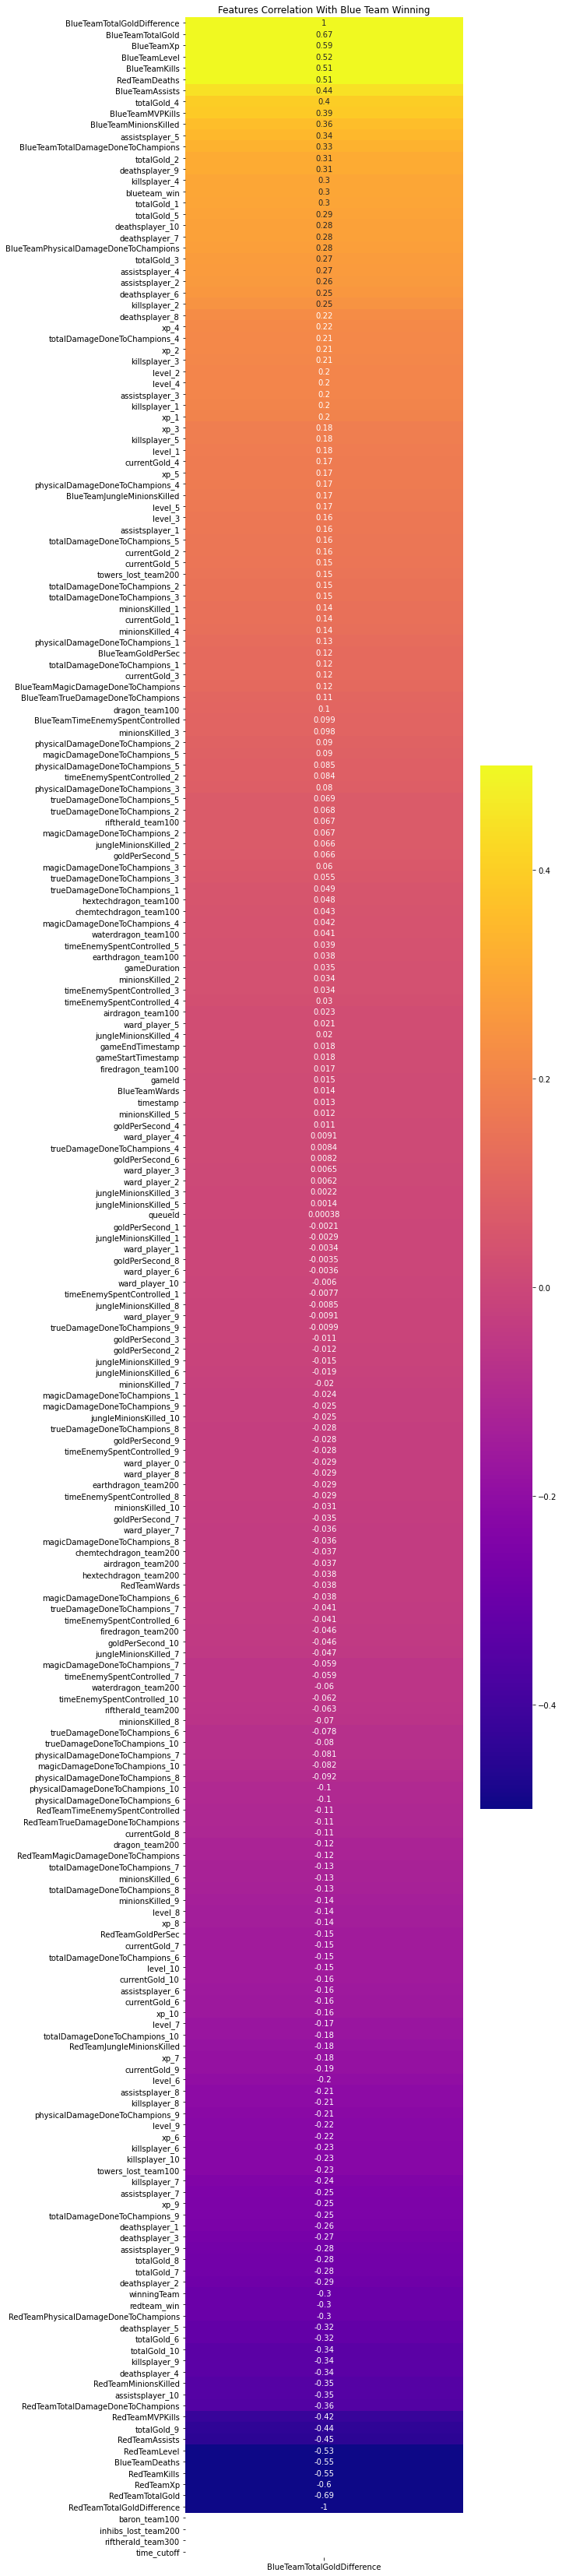

In [60]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With BlueTeamTotalGoldDifference')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

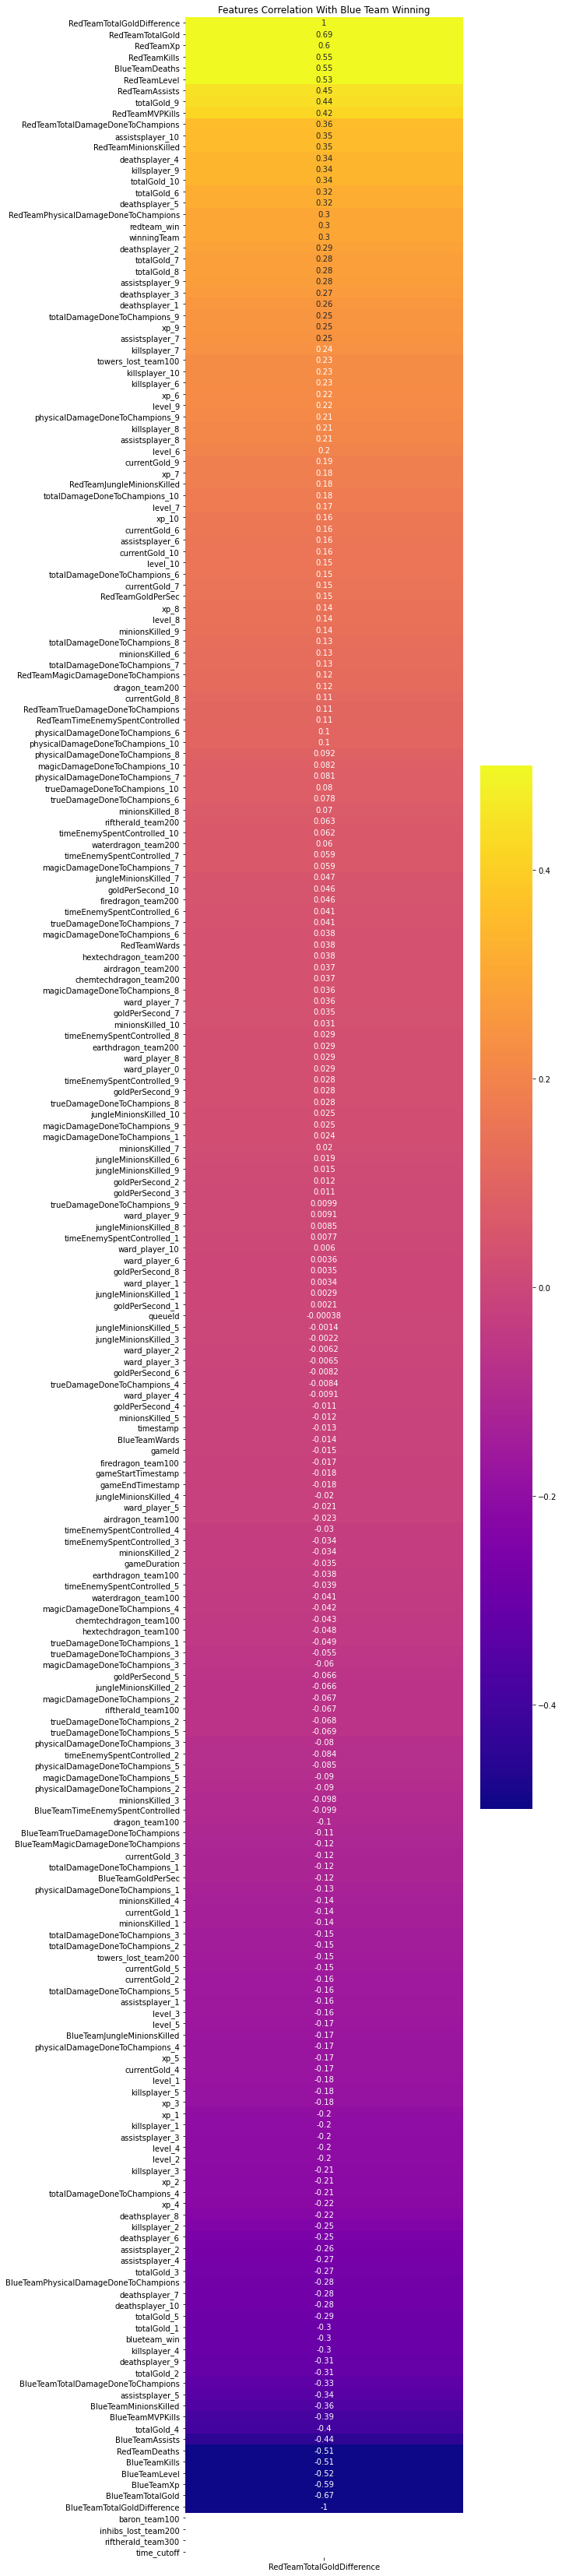

In [58]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['RedTeamTotalGoldDifference']].sort_values(by = 'RedTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

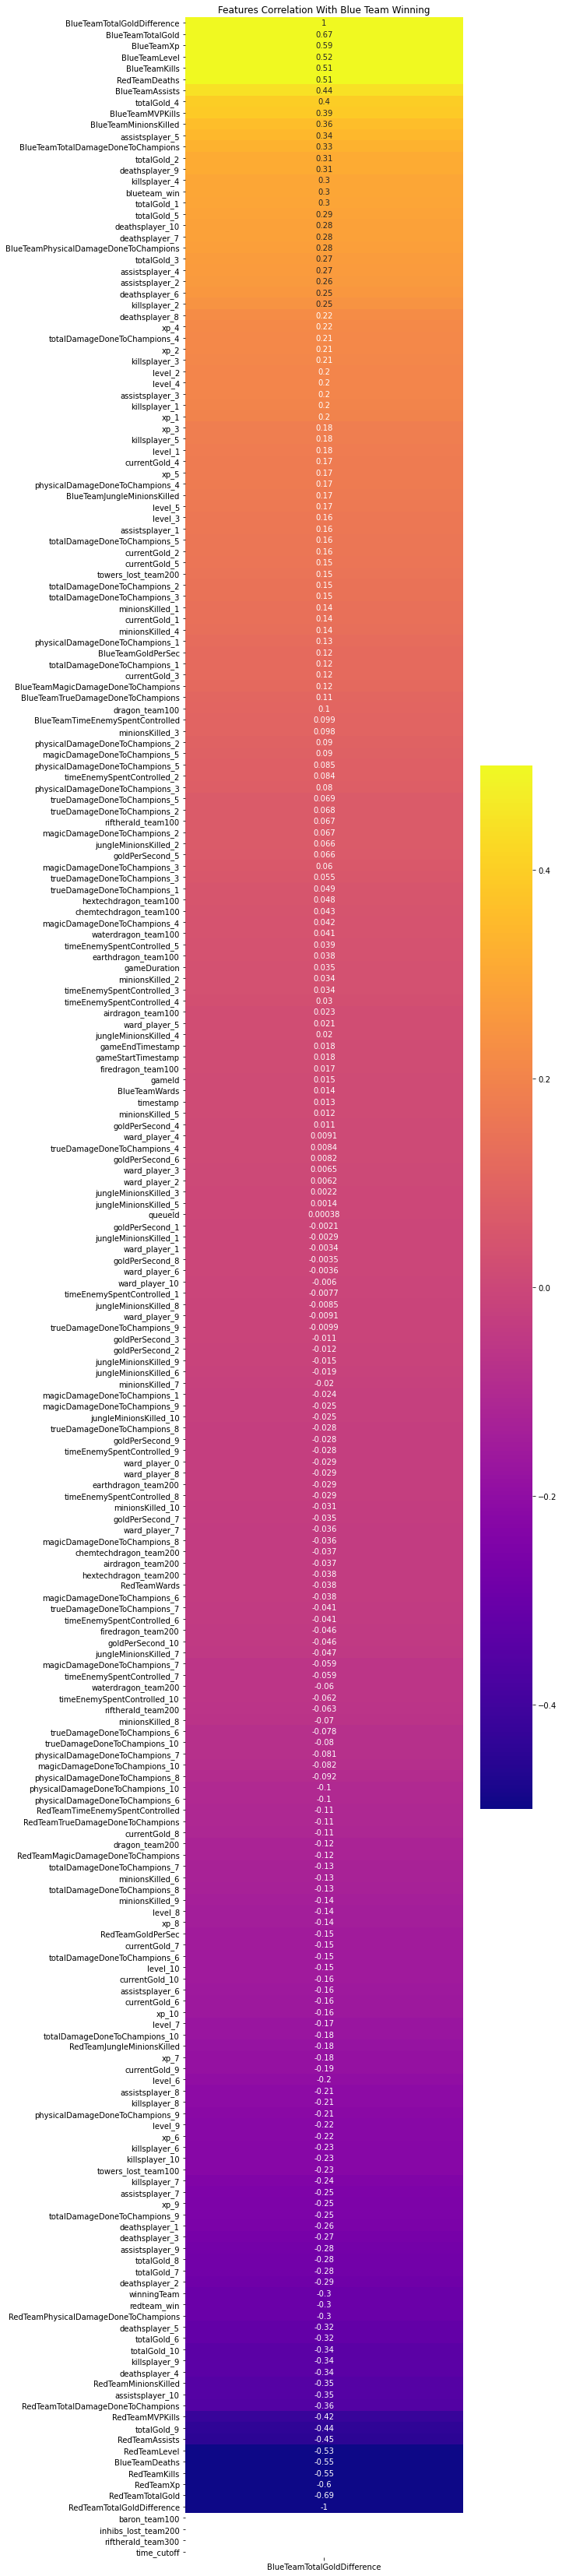

In [57]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

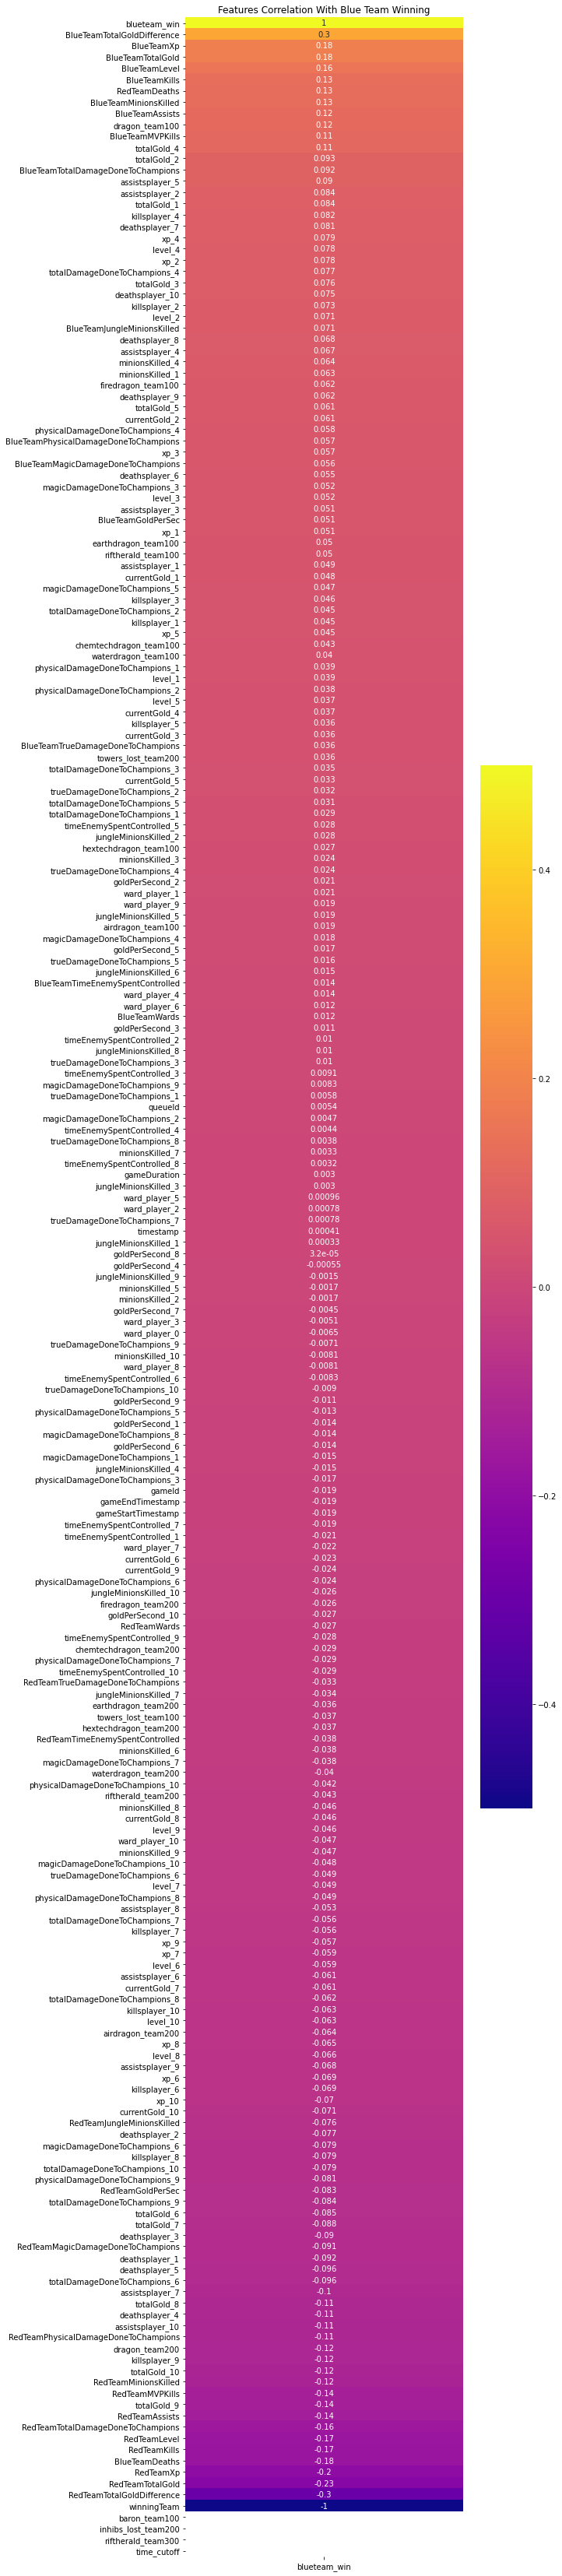

In [53]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['blueteam_win']].sort_values(by = 'blueteam_win',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With red Team Winning')

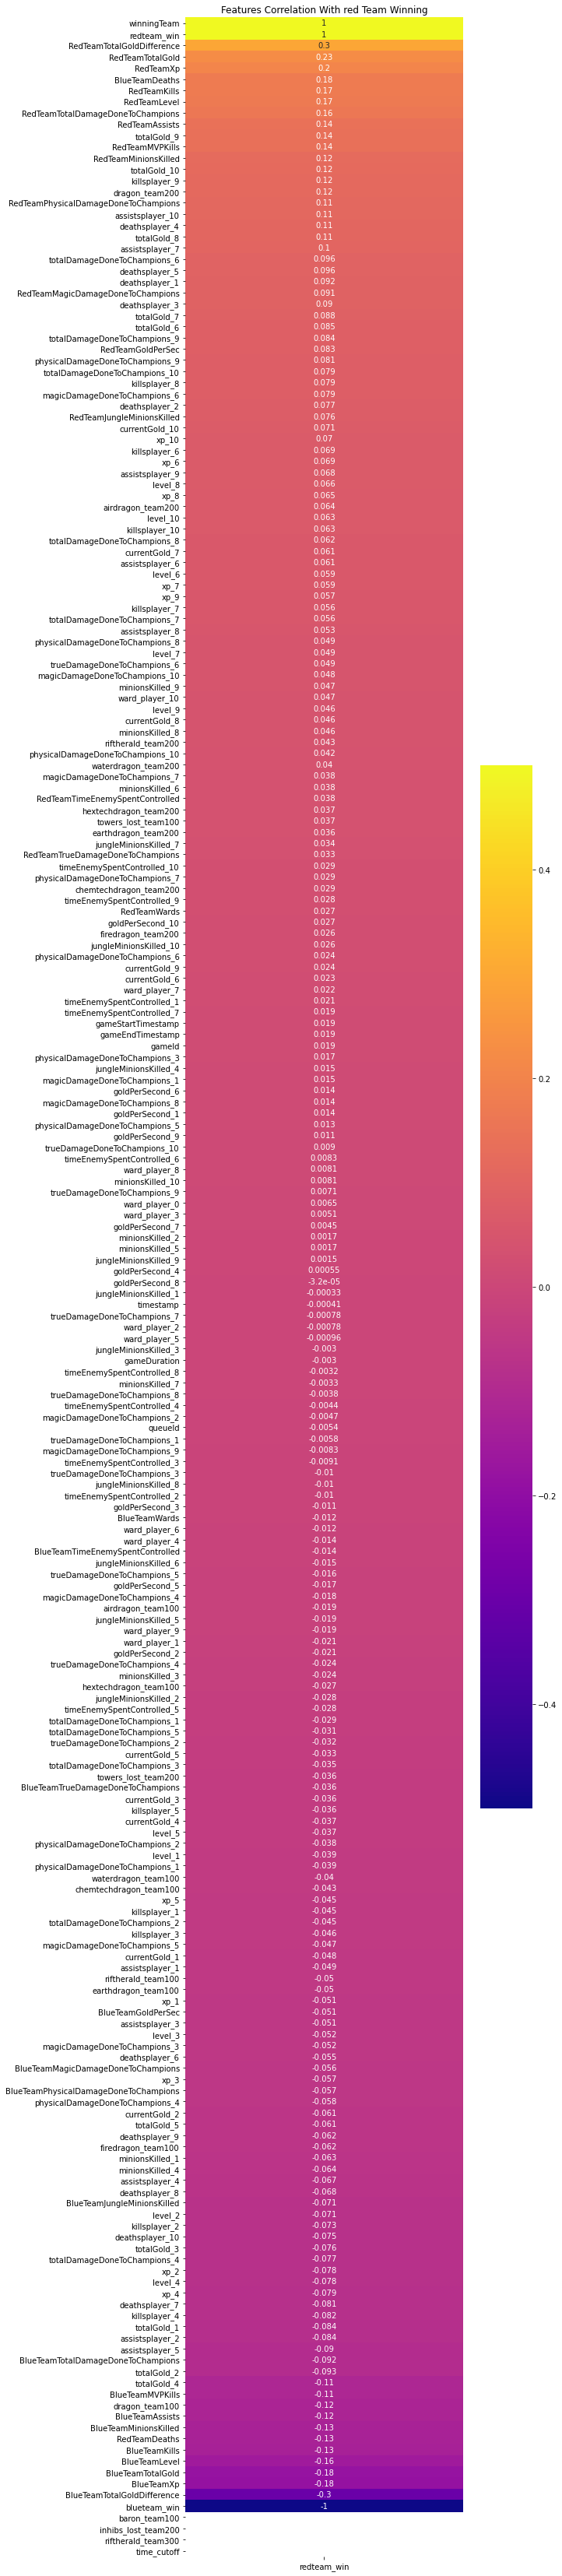

In [55]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['redteam_win']].sort_values(by = 'redteam_win',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With red Team Winning')

In [22]:
train.towers_lost_team100.value_counts()

9.0     540
10.0    446
8.0     436
3.0     421
11.0    395
4.0     366
7.0     362
2.0     341
6.0     298
5.0     289
1.0     216
0.0      72
Name: towers_lost_team100, dtype: int64

In [18]:
train[train.baron_team100 == 4]

,airdragon_team100,airdragon_team200,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,chemtechdragon_team100,chemtechdragon_team200,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team200,inhibs_lost_team100,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team200,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,baron_team200,hextechdragon_team100,waterdragon_team200,BlueTeamDeaths,RedTeamDeaths,BlueTeamGoldPerSec,RedTeamGoldPerSec,BlueTeamJungleMinionsKilled,RedTeamJungleMinionsKilled,BlueTeamKills,RedTeamKills,BlueTeamLevel,RedTeamLevel,BlueTeamMagicDamageDoneToChampions,RedTeamMagicDamageDoneToChampions,BlueTeamMinionsKilled,RedTeamMinionsKilled,BlueTeamPhysicalDamageDoneToChampions,RedTeamPhysicalDamageDoneToChampions,BlueTeamTimeEnemySpentControlled,RedTeamTimeEnemySpentControlled,

In [21]:
1637277849508 - 1637280725547

-2876039

In [13]:
train.baron_team100.value_counts()

0.0    2088
1.0    1672
2.0     399
3.0      21
4.0       2
Name: baron_team100, dtype: int64

In [14]:
train.chemtechdragon_team100.value_counts()

0.0    2875
1.0     934
2.0     292
3.0      72
4.0       9
Name: chemtechdragon_team100, dtype: int64

In [23]:
train.chemtechdragon_team100.value_counts()

0.0    2875
1.0     934
2.0     292
3.0      72
4.0       9
Name: chemtechdragon_team100, dtype: int64

In [ ]:
train.chemtechdragon_team100.value_counts()

In [9]:
train_15,test_15 = prepare(df_15)

In [10]:
train_15

,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,baron_team200,chemtechdragon_team100,chemtechdragon_team200,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team100,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team200,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,waterdragon_team200,airdragon_team200,BlueTeamDeaths,RedTeamDeaths,BlueTeamGoldPerSec,RedTeamGoldPerSec,BlueTeamJungleMinionsKilled,RedTeamJungleMinionsKilled,BlueTeamKills,RedTeamKills,BlueTeamLevel,RedTeamLevel,BlueTeamMagicDamageDoneToChampions,RedTeamMagicDamageDoneToChampions,BlueTeamMinionsKilled,RedTeamMinionsKilled,BlueTeamPhysicalDamageDoneToChampions,RedTeamPhysicalDamageDoneToChampions,BlueTeamTimeEnemySpentControlled,RedTeamTimeEnemySpentControlled,